In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Using training data set

In [2]:
df = pd.read_csv('Hotel-A-train.csv')
df.head()

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
0,39428300,F,40,Latino,Grad,<25K,North,City Hotel,7/1/2015,7/2/2015,...,BB,No,No,No Deposit,Online,Yes,Check-In,Yes,10,218
1,77491756,F,49,Latino,Mid-School,50K -- 100K,East,City Hotel,7/1/2015,7/2/2015,...,BB,No,No,Refundable,Online,Yes,Check-In,No,0,185
2,73747291,F,42,caucasian,Grad,<25K,East,City Hotel,7/2/2015,7/6/2015,...,BB,No,No,No Deposit,Online,Yes,Check-In,No,0,119
3,67301739,M,25,African American,College,>100K,South,Airport Hotels,7/2/2015,7/3/2015,...,BB,No,No,Refundable,Agent,Yes,Check-In,Yes,5,144
4,77222321,F,62,Latino,High-School,25K --50K,East,Resort,7/3/2015,7/4/2015,...,BB,No,No,No Deposit,Direct,No,Check-In,Yes,10,242


In [3]:
df["Reservation_Status"][ (df["Reservation_Status"]=="Check-In")].count()

21240

In [4]:
df["Reservation_Status"][ (df["Reservation_Status"]=="No-Show")].count()

2125

In [5]:
df["Reservation_Status"][ (df["Reservation_Status"]=="Canceled")].count()

4134

In [6]:
df["Gender"][(df["Gender"]=="M") & (df["Reservation_Status"]=="Check-In")].count()

10604

#### Choosing Features

##### Ethnicity

In [7]:
Reservation_Status = ["Check-In", "No-Show", "Canceled"]
Asian_American = [df["Ethnicity"][(df["Ethnicity"]=="Asian American") & (df["Reservation_Status"]=="Check-In")].count(), df["Ethnicity"][(df["Ethnicity"]=="Asian American") & (df["Reservation_Status"]=="No-Show")].count(),df["Ethnicity"][(df["Ethnicity"]=="Asian American") & (df["Reservation_Status"]=="Canceled")].count()]
Latino = [df["Ethnicity"][(df["Ethnicity"]=="Latino") & (df["Reservation_Status"]=="Check-In")].count(), df["Ethnicity"][(df["Ethnicity"]=="Latino") & (df["Reservation_Status"]=="No-Show")].count(),df["Ethnicity"][(df["Ethnicity"]=="Latino") & (df["Reservation_Status"]=="Canceled")].count()]
caucasian = [df["Ethnicity"][(df["Ethnicity"]=="caucasian") & (df["Reservation_Status"]=="Check-In")].count(), df["Ethnicity"][(df["Ethnicity"]=="caucasian") & (df["Reservation_Status"]=="No-Show")].count(),df["Ethnicity"][(df["Ethnicity"]=="caucasian") & (df["Reservation_Status"]=="Canceled")].count()]
African_American = [df["Ethnicity"][(df["Ethnicity"]=="African American") & (df["Reservation_Status"]=="Check-In")].count(), df["Ethnicity"][(df["Ethnicity"]=="African American") & (df["Reservation_Status"]=="No-Show")].count(),df["Ethnicity"][(df["Ethnicity"]=="African American") & (df["Reservation_Status"]=="Canceled")].count()]

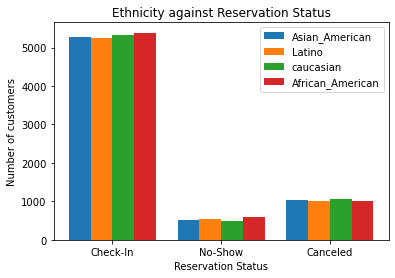

In [8]:
xpos = np.arange(len(Reservation_Status))

plt.bar(xpos-0.3,Asian_American, width=0.2, label="Asian_American")
plt.bar(xpos-0.1,Latino, width=0.2,label="Latino")
plt.bar(xpos+0.1,caucasian, width=0.2,label="caucasian")
plt.bar(xpos+0.3,African_American, width=0.2,label="African_American")

plt.xticks(xpos,Reservation_Status)
plt.ylabel("Number of customers")
plt.xlabel('Reservation Status')
plt.title('Ethnicity against Reservation Status')
plt.legend()

##### Educational Level

In [9]:
Reservation_Status = ["Check-In", "No-Show", "Canceled"]
Grad = [df["Educational_Level"][(df["Educational_Level"]=="Grad") & (df["Reservation_Status"]=="Check-In")].count(), df["Educational_Level"][(df["Educational_Level"]=="Grad") & (df["Reservation_Status"]=="No-Show")].count(),df["Educational_Level"][(df["Educational_Level"]=="Grad") & (df["Reservation_Status"]=="Canceled")].count()]
College = [df["Educational_Level"][(df["Educational_Level"]=="College") & (df["Reservation_Status"]=="Check-In")].count(), df["Educational_Level"][(df["Educational_Level"]=="College") & (df["Reservation_Status"]=="No-Show")].count(),df["Educational_Level"][(df["Educational_Level"]=="College") & (df["Reservation_Status"]=="Canceled")].count()]
HighSchool = [df["Educational_Level"][(df["Educational_Level"]=="High-School") & (df["Reservation_Status"]=="Check-In")].count(), df["Educational_Level"][(df["Educational_Level"]=="High-School") & (df["Reservation_Status"]=="No-Show")].count(),df["Educational_Level"][(df["Educational_Level"]=="High-School") & (df["Reservation_Status"]=="Canceled")].count()]
MidSchool = [df["Educational_Level"][(df["Educational_Level"]=="Mid-School") & (df["Reservation_Status"]=="Check-In")].count(), df["Educational_Level"][(df["Educational_Level"]=="Mid-School") & (df["Reservation_Status"]=="No-Show")].count(),df["Educational_Level"][(df["Educational_Level"]=="Mid-School") & (df["Reservation_Status"]=="Canceled")].count()]

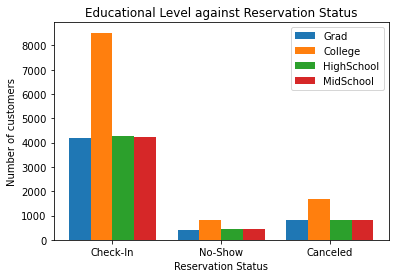

In [10]:
xpos = np.arange(len(Reservation_Status))

plt.bar(xpos-0.3,Grad, width=0.2, label="Grad")
plt.bar(xpos-0.1,College, width=0.2,label="College")
plt.bar(xpos+0.1,HighSchool, width=0.2,label="HighSchool")
plt.bar(xpos+0.3,MidSchool, width=0.2,label="MidSchool")

plt.xticks(xpos,Reservation_Status)
plt.ylabel("Number of customers")
plt.xlabel('Reservation Status')
plt.title('Educational Level against Reservation Status')
plt.legend()

##### Income

In [11]:
Reservation_Status = ["Check-In", "No-Show", "Canceled"]
LowIncome = [df["Income"][(df["Income"]=="<25K") & (df["Reservation_Status"]=="Check-In")].count(), df["Income"][(df["Income"]=="<25K") & (df["Reservation_Status"]=="No-Show")].count(),df["Income"][(df["Income"]=="<25K") & (df["Reservation_Status"]=="Canceled")].count()]
MediumIncome = [df["Income"][(df["Income"]=="25K --50K") & (df["Reservation_Status"]=="Check-In")].count(), df["Income"][(df["Income"]=="25K --50K") & (df["Reservation_Status"]=="No-Show")].count(),df["Income"][(df["Income"]=="25K --50K") & (df["Reservation_Status"]=="Canceled")].count()]
MediumHighIncome = [df["Income"][(df["Income"]=="50K -- 100K") & (df["Reservation_Status"]=="Check-In")].count(), df["Income"][(df["Income"]=="50K -- 100K") & (df["Reservation_Status"]=="No-Show")].count(),df["Income"][(df["Income"]=="50K -- 100K") & (df["Reservation_Status"]=="Canceled")].count()]
HighIncome = [df["Income"][(df["Income"]==">100K") & (df["Reservation_Status"]=="Check-In")].count(), df["Income"][(df["Income"]==">100K") & (df["Reservation_Status"]=="No-Show")].count(),df["Income"][(df["Income"]==">100K") & (df["Reservation_Status"]=="Canceled")].count()]

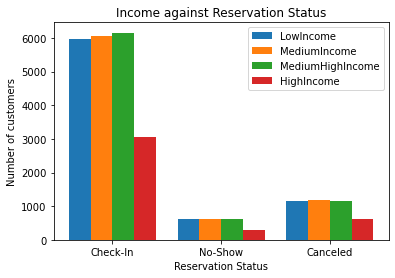

In [12]:
xpos = np.arange(len(Reservation_Status))

plt.bar(xpos-0.3,LowIncome, width=0.2, label="LowIncome")
plt.bar(xpos-0.1,MediumIncome, width=0.2,label="MediumIncome")
plt.bar(xpos+0.1,MediumHighIncome, width=0.2,label="MediumHighIncome")
plt.bar(xpos+0.3,HighIncome, width=0.2,label="HighIncome")

plt.xticks(xpos,Reservation_Status)
plt.ylabel("Number of customers")
plt.xlabel('Reservation Status')
plt.title('Income against Reservation Status')
plt.legend()

##### Deposit Type

In [13]:
Reservation_Status = ["Check-In", "No-Show", "Canceled"]
Refundable = [df["Deposit_type"][(df["Deposit_type"]=="Refundable") & (df["Reservation_Status"]=="Check-In")].count(), df["Deposit_type"][(df["Deposit_type"]=="Refundable") & (df["Reservation_Status"]=="No-Show")].count(),df["Deposit_type"][(df["Deposit_type"]=="Refundable") & (df["Reservation_Status"]=="Canceled")].count()]
NonRefundable = [df["Deposit_type"][(df["Deposit_type"]=="Non-Refundable") & (df["Reservation_Status"]=="Check-In")].count(), df["Deposit_type"][(df["Deposit_type"]=="Non-Refundable") & (df["Reservation_Status"]=="No-Show")].count(),df["Deposit_type"][(df["Deposit_type"]=="Non-Refundable") & (df["Reservation_Status"]=="Canceled")].count()]
NoDeposit = [df["Deposit_type"][(df["Deposit_type"]=="No Deposit") & (df["Reservation_Status"]=="Check-In")].count(), df["Deposit_type"][(df["Deposit_type"]=="No Deposit") & (df["Reservation_Status"]=="No-Show")].count(),df["Deposit_type"][(df["Deposit_type"]=="No Deposit") & (df["Reservation_Status"]=="Canceled")].count()]

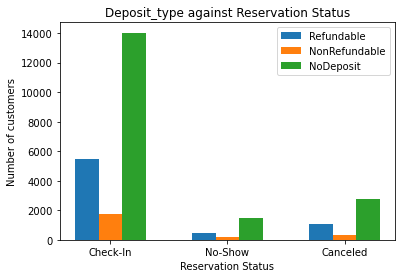

In [14]:
xpos = np.arange(len(Reservation_Status))

plt.bar(xpos-0.2,Refundable, width=0.2, label="Refundable")
plt.bar(xpos,NonRefundable, width=0.2,label="NonRefundable")
plt.bar(xpos+0.2,NoDeposit, width=0.2,label="NoDeposit")

plt.xticks(xpos,Reservation_Status)
plt.ylabel("Number of customers")
plt.xlabel('Reservation Status')
plt.title('Deposit_type against Reservation Status')
plt.legend()

In [15]:
(df["Deposit_type"][(df["Deposit_type"]=="Refundable") & (df["Reservation_Status"]=="Check-In")].count())/(df["Deposit_type"][(df["Deposit_type"]=="Refundable") & (df["Reservation_Status"]=="Canceled")].count())

5.2548076923076925

In [16]:
(df["Deposit_type"][(df["Deposit_type"]=="Non-Refundable") & (df["Reservation_Status"]=="Check-In")].count())/(df["Deposit_type"][(df["Deposit_type"]=="Non-Refundable") & (df["Reservation_Status"]=="Canceled")].count())

5.205357142857143

In [17]:
df.isna().any()

Reservation-id            False
Gender                    False
Age                       False
Ethnicity                 False
Educational_Level         False
Income                    False
Country_region            False
Hotel_Type                False
Expected_checkin          False
Expected_checkout         False
Booking_date              False
Adults                    False
Children                  False
Babies                    False
Meal_Type                 False
Visted_Previously         False
Previous_Cancellations    False
Deposit_type              False
Booking_channel           False
Required_Car_Parking      False
Reservation_Status        False
Use_Promotion             False
Discount_Rate             False
Room_Rate                 False
dtype: bool

In [18]:
y = df["Reservation_Status"]
y

0        Check-In
1        Check-In
2        Check-In
3        Check-In
4        Check-In
           ...   
27494    Check-In
27495     No-Show
27496    Check-In
27497    Canceled
27498     No-Show
Name: Reservation_Status, Length: 27499, dtype: object

In [19]:
df2 = df[["Hotel_Type", "Room_Rate", "Income", "Previous_Cancellations", "Visted_Previously", "Deposit_type", "Booking_channel", "Use_Promotion", "Discount_Rate"]]
df2

,Hotel_Type,Room_Rate,Income,Previous_Cancellations,Visted_Previously,Deposit_type,Booking_channel,Use_Promotion,Discount_Rate
0,City Hotel,218,<25K,No,No,No Deposit,Online,Yes,10
1,City Hotel,185,50K -- 100K,No,No,Refundable,Online,No,0
2,City Hotel,119,<25K,No,No,No Deposit,Online,No,0
3,Airport Hotels,144,>100K,No,No,Refundable,Agent,Yes,5
4,Resort,242,25K --50K,No,No,No Deposit,Direct,Yes,10
...,...,...,...,...,...,...,...,...,...
27494,City Hotel,100,<25K,Yes,Yes,No Deposit,Online,Yes,10
27495,Airport Hotels,194,25K --50K,No,No,Refundable,Agent,Yes,40
27496,Airport Hotels,202,50K -- 100K,No,No,No Deposit,Direct,Yes,5
27497,Airport Hotels,157,25K --50K,No,No,No Deposit,Online,Yes,20


In [20]:
X = pd.get_dummies(df2,drop_first=True)
X

,Room_Rate,Discount_Rate,Hotel_Type_City Hotel,Hotel_Type_Resort,Income_50K -- 100K,Income_<25K,Income_>100K,Previous_Cancellations_Yes,Visted_Previously_Yes,Deposit_type_Non-Refundable,Deposit_type_Refundable,Booking_channel_Direct,Booking_channel_Online,Use_Promotion_Yes
0,218,10,1,0,0,1,0,0,0,0,0,0,1,1
1,185,0,1,0,1,0,0,0,0,0,1,0,1,0
2,119,0,1,0,0,1,0,0,0,0,0,0,1,0
3,144,5,0,0,0,0,1,0,0,0,1,0,0,1
4,242,10,0,1,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27494,100,10,1,0,0,1,0,1,1,0,0,0,1,1
27495,194,40,0,0,0,0,0,0,0,0,1,0,0,1
27496,202,5,0,0,1,0,0,0,0,0,0,1,0,1
27497,157,20,0,0,0,0,0,0,0,0,0,0,1,1


In [21]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([1, 1, 1, ..., 1, 0, 2])

In [22]:
model = LogisticRegression()

In [23]:
model.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Using validation data set

In [24]:
df_val = pd.read_csv('Hotel-A-validation.csv')
df_val

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
0,45716350,M,56,caucasian,Grad,<25K,West,Resort,8/31/2016,9/2/2016,...,HB,No,No,No Deposit,Agent,No,No-Show,Yes,15,192
1,88857401,M,60,Latino,College,25K --50K,West,Resort,8/31/2016,9/4/2016,...,FB,Yes,No,No Deposit,Online,Yes,Canceled,No,0,187
2,16074440,F,58,Asian American,College,<25K,North,Airport Hotels,9/1/2016,9/2/2016,...,FB,No,No,No Deposit,Direct,No,Canceled,Yes,10,227
3,10992124,F,23,Latino,College,25K --50K,East,Airport Hotels,8/31/2016,9/2/2016,...,FB,Yes,No,Refundable,Direct,No,Check-In,Yes,25,189
4,15934351,F,47,Asian American,College,25K --50K,South,City Hotel,8/31/2016,9/1/2016,...,HB,Yes,No,No Deposit,Online,Yes,Check-In,Yes,10,218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,32194836,F,22,caucasian,College,50K -- 100K,South,Resort,11/18/2016,11/21/2016,...,BB,Yes,No,Refundable,Online,No,Check-In,Yes,10,199
2745,52215692,F,35,caucasian,College,25K --50K,South,Airport Hotels,12/9/2016,12/10/2016,...,FB,No,No,Non-Refundable,Direct,Yes,Canceled,Yes,5,106
2746,31908733,M,18,Asian American,Grad,25K --50K,North,Resort,11/18/2016,11/20/2016,...,FB,No,No,Refundable,Agent,No,No-Show,Yes,20,136
2747,41776403,M,42,Asian American,College,<25K,West,City Hotel,11/18/2016,11/19/2016,...,HB,Yes,Yes,No Deposit,Online,Yes,Check-In,Yes,20,226


In [25]:
df2_val = df_val[["Hotel_Type", "Room_Rate", "Income", "Previous_Cancellations", "Visted_Previously", "Deposit_type", "Booking_channel", "Use_Promotion", "Discount_Rate"]]
df2_val

,Hotel_Type,Room_Rate,Income,Previous_Cancellations,Visted_Previously,Deposit_type,Booking_channel,Use_Promotion,Discount_Rate
0,Resort,192,<25K,No,No,No Deposit,Agent,Yes,15
1,Resort,187,25K --50K,No,Yes,No Deposit,Online,No,0
2,Airport Hotels,227,<25K,No,No,No Deposit,Direct,Yes,10
3,Airport Hotels,189,25K --50K,No,Yes,Refundable,Direct,Yes,25
4,City Hotel,218,25K --50K,No,Yes,No Deposit,Online,Yes,10
...,...,...,...,...,...,...,...,...,...
2744,Resort,199,50K -- 100K,No,Yes,Refundable,Online,Yes,10
2745,Airport Hotels,106,25K --50K,No,No,Non-Refundable,Direct,Yes,5
2746,Resort,136,25K --50K,No,No,Refundable,Agent,Yes,20
2747,City Hotel,226,<25K,Yes,Yes,No Deposit,Online,Yes,20


In [26]:
X_val = pd.get_dummies(df2_val,drop_first=True)
X_val

,Room_Rate,Discount_Rate,Hotel_Type_City Hotel,Hotel_Type_Resort,Income_50K -- 100K,Income_<25K,Income_>100K,Previous_Cancellations_Yes,Visted_Previously_Yes,Deposit_type_Non-Refundable,Deposit_type_Refundable,Booking_channel_Direct,Booking_channel_Online,Use_Promotion_Yes
0,192,15,0,1,0,1,0,0,0,0,0,0,0,1
1,187,0,0,1,0,0,0,0,1,0,0,0,1,0
2,227,10,0,0,0,1,0,0,0,0,0,1,0,1
3,189,25,0,0,0,0,0,0,1,0,1,1,0,1
4,218,10,1,0,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,199,10,0,1,1,0,0,0,1,0,1,0,1,1
2745,106,5,0,0,0,0,0,0,0,1,0,1,0,1
2746,136,20,0,1,0,0,0,0,0,0,1,0,0,1
2747,226,20,1,0,0,1,0,1,1,0,0,0,1,1


In [27]:
y_val = df_val["Reservation_Status"]
y_val

0        No-Show
1       Canceled
2       Canceled
3       Check-In
4       Check-In
          ...   
2744    Check-In
2745    Canceled
2746     No-Show
2747    Check-In
2748    Check-In
Name: Reservation_Status, Length: 2749, dtype: object

In [28]:
y_val = le.fit_transform(y_val)
y_val

array([2, 0, 0, ..., 2, 1, 1])

In [29]:
#test = model.predict(X_val)

In [30]:
model.score(X_val, y_val)

0.5856675154601674

### Using test data set

In [31]:
df_test = pd.read_csv('Hotel-A-test.csv')
df2_test = df_test[["Hotel_Type", "Room_Rate", "Income", "Previous_Cancellations", "Visted_Previously", "Deposit_type", "Booking_channel", "Use_Promotion", "Discount_Rate"]]

X_test = pd.get_dummies(df2_test,drop_first=True)
y_test_predict = model.predict(X_test)

In [32]:
y_test_predict

array([1, 1, 1, ..., 1, 1, 1])

In [33]:
for i in np.arange(len(y_test_predict)):
    if y_test_predict[i]==0:
        y_test_predict[i] = 2
    elif y_test_predict[i]==2:
        y_test_predict[i] = 3
y_test_predict

array([1, 1, 1, ..., 1, 1, 1])

In [34]:
df_y = pd.DataFrame(y_test_predict)
df_y.columns =["Reservation_Status"] 
df_y

,Reservation_Status
0,1
1,1
2,1
3,1
4,1
...,...
4313,1
4314,1
4315,1
4316,1


In [35]:
df_test_new = pd.concat([df_test["Reservation-id"], df_y], axis=1)
df_test_new

,Reservation-id,Reservation_Status
0,62931593,1
1,70586099,1
2,4230648,1
3,25192322,1
4,80931528,1
...,...,...
4313,39110574,1
4314,5496554,1
4315,59004046,1
4316,65838682,1


In [36]:
df_test_new.to_csv("Test.csv", index=False)